In [1]:
"""
Chapter_1.1.1. Linear Regression Example
参考
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
"""
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

print(diabetes.keys())
print(diabetes["target"].shape)
print(diabetes["target"][0:3])
#print(diabetes["DESCR"])
print(diabetes["feature_names"])
print(diabetes.data[0:2, np.newaxis, :])
print(diabetes_X.shape)

dict_keys(['target', 'feature_names', 'data', 'DESCR'])
(442,)
[ 151.   75.  141.]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
   -0.04340085 -0.00259226  0.01990842 -0.01764613]]

 [[-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
    0.07441156 -0.03949338 -0.06832974 -0.09220405]]]
(442, 1)


In [3]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

print(diabetes_X_train[0:2,:])
print(diabetes_X_train.shape)
print(diabetes_X_test.shape)
print(diabetes_y_train[0:2])
print(diabetes_y_train.shape)
print(diabetes_y_test.shape)

[[ 0.06169621]
 [-0.05147406]]
(422, 1)
(20, 1)
[ 151.   75.]
(422,)
(20,)


In [4]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: ', regr.coef_)
# The intercept
print('Intercept: ', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients:  [ 938.23786125]
Intercept:  152.918861826
Mean squared error: 2548.07
Variance score: 0.47


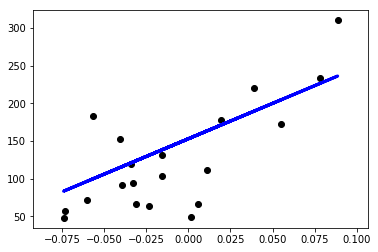

In [5]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()